In [2]:
import os, sys
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import datetime
from datetime import date
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline

# 10 Stations

In [24]:
df = pd.read_csv('../Data/selected_dock_data.csv', error_bad_lines=False, index_col = 'Unnamed: 0')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['month'] = df['date'].dt.month


lr_accuracy = 0.664, lr_recall = 0.123, lr_precision = 0.556, lr_f1 = 0.202
tree_accuracy = 0.695, tree_recall = 0.393, tree_precision = 0.586, tree_f1 = 0.470
forest_accuracy = 0.690, forest_recall = 0.445, forest_precision = 0.564, forest_f1 = 0.497
GB_accuracy = 0.708, GB_recall = 0.240, GB_precision = 0.734, GB_f1 = 0.362


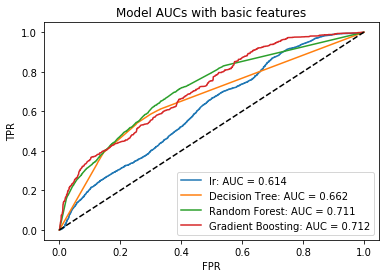

In [213]:
d_train = df[df.month.isin([1,2,3,4,5,6,7,8])]
d_test = df[df.month.isin([9,10])]

X_train = d_train.drop(['date','dayofyear','month','day_x','day_y','dock_name', 'hour', 'in_service','status_key','avail_bikes','avail_docks', 'dock_name6','time_x','time_y','shortage'],1)
Y_train = d_train.shortage

X_test = d_test.drop(['date','dayofyear','month' ,'day_x','day_y', 'dock_name', 'hour', 'in_service','status_key','avail_bikes','avail_docks', 'dock_name6','time_x','time_y','shortage'],1)
Y_test = d_test.shortage



lr = LogisticRegression()
lr.fit(X_train,Y_train)

lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve (Y_test, lr.predict_proba(X_test)[:,1])
lr_auc = metrics.auc(lr_fpr, lr_tpr)
lr_accuracy = metrics.accuracy_score(Y_test, lr.predict(X_test))
lr_recall = metrics.recall_score(Y_test, lr.predict(X_test))
lr_precision = metrics.precision_score(Y_test, lr.predict(X_test))
lr_f1 = metrics.f1_score(Y_test, lr.predict(X_test))
print('lr_accuracy = {accu:5.3f}, lr_recall = {rec:5.3f}, lr_precision = {prec:5.3f}, lr_f1 = {f1:5.3f}'.format(accu = lr_accuracy, rec = lr_recall, prec = lr_precision, f1 = lr_f1))


plt.plot(lr_fpr,lr_tpr,label = 'lr: AUC = {auc:5.3f}'.format(auc = lr_auc))

#Decision Tree

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

tree_fpr, tree_tpr, tree_threshold = metrics.roc_curve (Y_test, tree.predict_proba(X_test)[:,1])
tree_auc = metrics.auc(tree_fpr, tree_tpr)
tree_accuracy = metrics.accuracy_score(Y_test, tree.predict(X_test))
tree_recall = metrics.recall_score(Y_test, tree.predict(X_test))
tree_precision = metrics.precision_score(Y_test, tree.predict(X_test))
tree_f1 = metrics.f1_score(Y_test, tree.predict(X_test))
print('tree_accuracy = {accu:5.3f}, tree_recall = {rec:5.3f}, tree_precision = {prec:5.3f}, tree_f1 = {f1:5.3f}'.format(accu = tree_accuracy, rec = tree_recall, prec = tree_precision, f1 = tree_f1))


plt.plot(tree_fpr,tree_tpr,label = 'Decision Tree: AUC = {auc:5.3f}'.format(auc = tree_auc))

#Random Forest 
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

forest_fpr, forest_tpr, forest_threshold = metrics.roc_curve (Y_test, forest.predict_proba(X_test)[:,1])
forest_auc = metrics.auc(forest_fpr, forest_tpr)
forest_accuracy = metrics.accuracy_score(Y_test, forest.predict(X_test))
forest_recall = metrics.recall_score(Y_test, forest.predict(X_test))
forest_precision = metrics.precision_score(Y_test, forest.predict(X_test))
forest_f1 = metrics.f1_score(Y_test, forest.predict(X_test))
print('forest_accuracy = {accu:5.3f}, forest_recall = {rec:5.3f}, forest_precision = {prec:5.3f}, forest_f1 = {f1:5.3f}'.format(accu = forest_accuracy, rec = forest_recall, prec = forest_precision, f1 = forest_f1))


plt.plot(forest_fpr, forest_tpr,label = 'Random Forest: AUC = {auc:5.3f}'.format(auc = forest_auc))



#Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

gb_fpr, gb_tpr, gb_threshold = metrics.roc_curve (Y_test, gb.predict_proba(X_test)[:,1])
gb_auc = metrics.auc(gb_fpr, gb_tpr)
gb_accuracy = metrics.accuracy_score(Y_test, gb.predict(X_test))
gb_recall = metrics.recall_score(Y_test, gb.predict(X_test))
gb_precision = metrics.precision_score(Y_test, gb.predict(X_test))
gb_f1 = metrics.f1_score(Y_test, gb.predict(X_test))
print('GB_accuracy = {accu:5.3f}, GB_recall = {rec:5.3f}, GB_precision = {prec:5.3f}, GB_f1 = {f1:5.3f}'.format(accu = gb_accuracy, rec = gb_recall, prec = gb_precision, f1 = gb_f1))


plt.plot(gb_fpr, gb_tpr,label = 'Gradient Boosting: AUC = {auc:5.3f}'.format(auc = gb_auc))



plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,0.5,1],[0,0.5,1],'k--')
plt.legend()
plt.title('Model AUCs with basic features')
plt.savefig('baseline1.jpg')

# run with engineered-time features

lr_accuracy = 0.657, lr_recall = 0.124, lr_precision = 0.511, lr_f1 = 0.199
tree_accuracy = 0.695, tree_recall = 0.390, tree_precision = 0.586, tree_f1 = 0.468
forest_accuracy = 0.693, forest_recall = 0.444, forest_precision = 0.571, forest_f1 = 0.499
GB_accuracy = 0.718, GB_recall = 0.263, GB_precision = 0.762, GB_f1 = 0.391


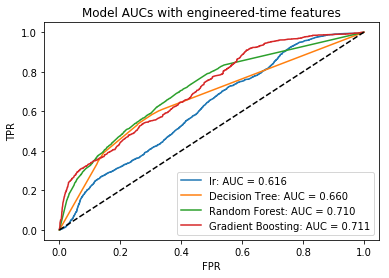

In [216]:
X_train = d_train.drop(['date','dayofyear','day_x','day_y','month','dock_name', 'hour','in_service','status_key', 'avail_bikes','avail_docks', 'dock_name6','hour_24','minute','shortage'],1)
Y_train = d_train.shortage

X_test = d_test.drop(['date','dayofyear','day_x','day_y','month','dock_name', 'hour', 'in_service','status_key','avail_bikes','avail_docks', 'dock_name6','hour_24','minute','shortage'],1)
Y_test = d_test.shortage


lr = LogisticRegression()
lr.fit(X_train,Y_train)

lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve (Y_test, lr.predict_proba(X_test)[:,1])
lr_auc = metrics.auc(lr_fpr, lr_tpr)
lr_accuracy = metrics.accuracy_score(Y_test, lr.predict(X_test))
lr_recall = metrics.recall_score(Y_test, lr.predict(X_test))
lr_precision = metrics.precision_score(Y_test, lr.predict(X_test))
lr_f1 = metrics.f1_score(Y_test, lr.predict(X_test))
print('lr_accuracy = {accu:5.3f}, lr_recall = {rec:5.3f}, lr_precision = {prec:5.3f}, lr_f1 = {f1:5.3f}'.format(accu = lr_accuracy, rec = lr_recall, prec = lr_precision, f1 = lr_f1))


plt.plot(lr_fpr,lr_tpr,label = 'lr: AUC = {auc:5.3f}'.format(auc = lr_auc))

#Decision Tree

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

tree_fpr, tree_tpr, tree_threshold = metrics.roc_curve (Y_test, tree.predict_proba(X_test)[:,1])
tree_auc = metrics.auc(tree_fpr, tree_tpr)
tree_accuracy = metrics.accuracy_score(Y_test, tree.predict(X_test))
tree_recall = metrics.recall_score(Y_test, tree.predict(X_test))
tree_precision = metrics.precision_score(Y_test, tree.predict(X_test))
tree_f1 = metrics.f1_score(Y_test, tree.predict(X_test))
print('tree_accuracy = {accu:5.3f}, tree_recall = {rec:5.3f}, tree_precision = {prec:5.3f}, tree_f1 = {f1:5.3f}'.format(accu = tree_accuracy, rec = tree_recall, prec = tree_precision, f1 = tree_f1))


plt.plot(tree_fpr,tree_tpr,label = 'Decision Tree: AUC = {auc:5.3f}'.format(auc = tree_auc))

#Random Forest 
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

forest_fpr, forest_tpr, forest_threshold = metrics.roc_curve (Y_test, forest.predict_proba(X_test)[:,1])
forest_auc = metrics.auc(forest_fpr, forest_tpr)
forest_accuracy = metrics.accuracy_score(Y_test, forest.predict(X_test))
forest_recall = metrics.recall_score(Y_test, forest.predict(X_test))
forest_precision = metrics.precision_score(Y_test, forest.predict(X_test))
forest_f1 = metrics.f1_score(Y_test, forest.predict(X_test))
print('forest_accuracy = {accu:5.3f}, forest_recall = {rec:5.3f}, forest_precision = {prec:5.3f}, forest_f1 = {f1:5.3f}'.format(accu = forest_accuracy, rec = forest_recall, prec = forest_precision, f1 = forest_f1))


plt.plot(forest_fpr, forest_tpr,label = 'Random Forest: AUC = {auc:5.3f}'.format(auc = forest_auc))



#Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

gb_fpr, gb_tpr, gb_threshold = metrics.roc_curve (Y_test, gb.predict_proba(X_test)[:,1])
gb_auc = metrics.auc(gb_fpr, gb_tpr)
gb_accuracy = metrics.accuracy_score(Y_test, gb.predict(X_test))
gb_recall = metrics.recall_score(Y_test, gb.predict(X_test))
gb_precision = metrics.precision_score(Y_test, gb.predict(X_test))
gb_f1 = metrics.f1_score(Y_test, gb.predict(X_test))
print('GB_accuracy = {accu:5.3f}, GB_recall = {rec:5.3f}, GB_precision = {prec:5.3f}, GB_f1 = {f1:5.3f}'.format(accu = gb_accuracy, rec = gb_recall, prec = gb_precision, f1 = gb_f1))


plt.plot(gb_fpr, gb_tpr,label = 'Gradient Boosting: AUC = {auc:5.3f}'.format(auc = gb_auc))



plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,0.5,1],[0,0.5,1],'k--')
plt.legend()
plt.title('Model AUCs with engineered-time features')
plt.savefig('baseline2.jpg')

# with weather data

In [29]:
def parse_weather(file_path):

    weather_data = pd.read_csv(file_path)

    weather = weather_data.loc[:,['pickup_datetime',
                        'tempi', #temperature in farenheit
                        'presipi', #presipitation
                        'wspdi', #wind speed in mph
                       'rain', # rain, boolean
                       'snow',# snow, boolean
                       'thunder', # thunder, boolean
                       'visi' ]] #vibilitity in miles
    weather_features = list(weather.columns[1:])


    weather.fillna(0, inplace=True)
    weather['datetime'] = pd.to_datetime(weather['pickup_datetime'], format='%Y-%m-%d %H:%M::%S', infer_datetime_format=True)
    weather['date'] = weather['datetime'].dt.date
    weather['hour_24'] = weather['datetime'].dt.hour+1
    weather['minute'] = weather['datetime'].dt.minute
    weather.drop(['pickup_datetime', 'datetime'],axis = 1, inplace = True)

    g = weather[['tempi', 'presipi', 'wspdi', 'rain', 'snow', 'thunder', 'visi']].groupby([weather['date'], weather['hour_24']])
    weather_by_hour = g.mean()

    for i in ['rain', 'snow', 'thunder']:
        weather_by_hour[i] = [1 if w>0 else 0 for w in weather_by_hour[i]]

    weather_by_hour.reset_index(inplace = True)
    return weather_by_hour

In [30]:
def merge_weather (weather_df, df):

    df['date'] = pd.to_datetime(df['date']).dt.date
    df_weather = pd.merge(df, weather_df, on=['date','hour_24'], how = 'left')
    df_weather.fillna(method = 'bfill', inplace = True)
    return df_weather

In [31]:
weather_file_path = '../Data/Weather.csv'
weather_by_hour = parse_weather(weather_file_path)
df_weather = merge_weather(weather_by_hour, df)


In [221]:

d_train = df_weather[df_weather.month.isin([1,2,3,4,5,6,7,8])]
d_test = df_weather[df_weather.month.isin([9,10])]

X_train = d_train.drop(['date','dayofyear','month','day_x','day_y','dock_name', 'hour', 'in_service','status_key','avail_bikes','avail_docks', 'dock_name6','time_x','time_y','shortage'],1)
Y_train = d_train.shortage

X_test = d_test.drop(['date','dayofyear','month','day_x','day_y','dock_name', 'hour', 'in_service','status_key','avail_bikes','avail_docks', 'dock_name6','time_x','time_y','shortage'],1)
Y_test = d_test.shortage



lr_accuracy = 0.660, lr_recall = 0.140, lr_precision = 0.527, lr_f1 = 0.221
tree_accuracy = 0.677, tree_recall = 0.523, tree_precision = 0.533, tree_f1 = 0.528
forest_accuracy = 0.713, forest_recall = 0.451, forest_precision = 0.614, forest_f1 = 0.520
GB_accuracy = 0.711, GB_recall = 0.253, GB_precision = 0.735, GB_f1 = 0.377


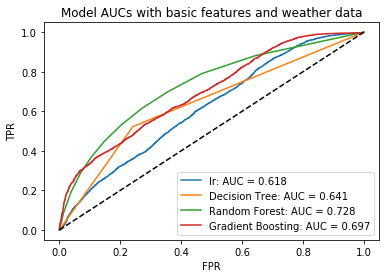

In [223]:


lr = LogisticRegression()
lr.fit(X_train,Y_train)

lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve (Y_test, lr.predict_proba(X_test)[:,1])
lr_auc = metrics.auc(lr_fpr, lr_tpr)
lr_accuracy = metrics.accuracy_score(Y_test, lr.predict(X_test))
lr_recall = metrics.recall_score(Y_test, lr.predict(X_test))
lr_precision = metrics.precision_score(Y_test, lr.predict(X_test))
lr_f1 = metrics.f1_score(Y_test, lr.predict(X_test))
print('lr_accuracy = {accu:5.3f}, lr_recall = {rec:5.3f}, lr_precision = {prec:5.3f}, lr_f1 = {f1:5.3f}'.format(accu = lr_accuracy, rec = lr_recall, prec = lr_precision, f1 = lr_f1))


plt.plot(lr_fpr,lr_tpr,label = 'lr: AUC = {auc:5.3f}'.format(auc = lr_auc))

#Decision Tree

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

tree_fpr, tree_tpr, tree_threshold = metrics.roc_curve (Y_test, tree.predict_proba(X_test)[:,1])
tree_auc = metrics.auc(tree_fpr, tree_tpr)
tree_accuracy = metrics.accuracy_score(Y_test, tree.predict(X_test))
tree_recall = metrics.recall_score(Y_test, tree.predict(X_test))
tree_precision = metrics.precision_score(Y_test, tree.predict(X_test))
tree_f1 = metrics.f1_score(Y_test, tree.predict(X_test))
print('tree_accuracy = {accu:5.3f}, tree_recall = {rec:5.3f}, tree_precision = {prec:5.3f}, tree_f1 = {f1:5.3f}'.format(accu = tree_accuracy, rec = tree_recall, prec = tree_precision, f1 = tree_f1))


plt.plot(tree_fpr,tree_tpr,label = 'Decision Tree: AUC = {auc:5.3f}'.format(auc = tree_auc))

#Random Forest 
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

forest_fpr, forest_tpr, forest_threshold = metrics.roc_curve (Y_test, forest.predict_proba(X_test)[:,1])
forest_auc = metrics.auc(forest_fpr, forest_tpr)
forest_accuracy = metrics.accuracy_score(Y_test, forest.predict(X_test))
forest_recall = metrics.recall_score(Y_test, forest.predict(X_test))
forest_precision = metrics.precision_score(Y_test, forest.predict(X_test))
forest_f1 = metrics.f1_score(Y_test, forest.predict(X_test))
print('forest_accuracy = {accu:5.3f}, forest_recall = {rec:5.3f}, forest_precision = {prec:5.3f}, forest_f1 = {f1:5.3f}'.format(accu = forest_accuracy, rec = forest_recall, prec = forest_precision, f1 = forest_f1))


plt.plot(forest_fpr, forest_tpr,label = 'Random Forest: AUC = {auc:5.3f}'.format(auc = forest_auc))



#Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

gb_fpr, gb_tpr, gb_threshold = metrics.roc_curve (Y_test, gb.predict_proba(X_test)[:,1])
gb_auc = metrics.auc(gb_fpr, gb_tpr)
gb_accuracy = metrics.accuracy_score(Y_test, gb.predict(X_test))
gb_recall = metrics.recall_score(Y_test, gb.predict(X_test))
gb_precision = metrics.precision_score(Y_test, gb.predict(X_test))
gb_f1 = metrics.f1_score(Y_test, gb.predict(X_test))
print('GB_accuracy = {accu:5.3f}, GB_recall = {rec:5.3f}, GB_precision = {prec:5.3f}, GB_f1 = {f1:5.3f}'.format(accu = gb_accuracy, rec = gb_recall, prec = gb_precision, f1 = gb_f1))


plt.plot(gb_fpr, gb_tpr,label = 'Gradient Boosting: AUC = {auc:5.3f}'.format(auc = gb_auc))



plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,0.5,1],[0,0.5,1],'k--')
plt.legend()
plt.title('Model AUCs with basic features and weather data')
plt.savefig('baseline3.jpg')

lr_accuracy = 0.660, lr_recall = 0.150, lr_precision = 0.525, lr_f1 = 0.233
tree_accuracy = 0.679, tree_recall = 0.506, tree_precision = 0.537, tree_f1 = 0.521
forest_accuracy = 0.714, forest_recall = 0.456, forest_precision = 0.615, forest_f1 = 0.524
GB_accuracy = 0.718, GB_recall = 0.273, GB_precision = 0.749, GB_f1 = 0.400


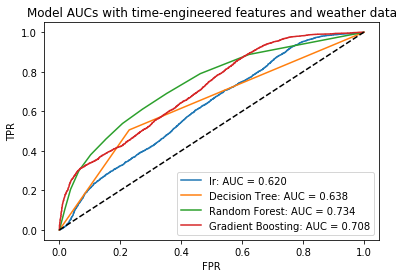

In [224]:
X_train = d_train.drop(['date','dayofyear','day_x','day_y','month','dock_name', 'hour','in_service','status_key', 'avail_bikes','avail_docks', 'dock_name6','hour_24','minute','shortage'],1)
Y_train = d_train.shortage

X_test = d_test.drop(['date','dayofyear','day_x','day_y','month','dock_name', 'hour', 'in_service','status_key','avail_bikes','avail_docks', 'dock_name6','hour_24','minute','shortage'],1)
Y_test = d_test.shortage


lr = LogisticRegression()
lr.fit(X_train,Y_train)

lr_fpr, lr_tpr, lr_threshold = metrics.roc_curve (Y_test, lr.predict_proba(X_test)[:,1])
lr_auc = metrics.auc(lr_fpr, lr_tpr)
lr_accuracy = metrics.accuracy_score(Y_test, lr.predict(X_test))
lr_recall = metrics.recall_score(Y_test, lr.predict(X_test))
lr_precision = metrics.precision_score(Y_test, lr.predict(X_test))
lr_f1 = metrics.f1_score(Y_test, lr.predict(X_test))
print('lr_accuracy = {accu:5.3f}, lr_recall = {rec:5.3f}, lr_precision = {prec:5.3f}, lr_f1 = {f1:5.3f}'.format(accu = lr_accuracy, rec = lr_recall, prec = lr_precision, f1 = lr_f1))


plt.plot(lr_fpr,lr_tpr,label = 'lr: AUC = {auc:5.3f}'.format(auc = lr_auc))

#Decision Tree

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

tree_fpr, tree_tpr, tree_threshold = metrics.roc_curve (Y_test, tree.predict_proba(X_test)[:,1])
tree_auc = metrics.auc(tree_fpr, tree_tpr)
tree_accuracy = metrics.accuracy_score(Y_test, tree.predict(X_test))
tree_recall = metrics.recall_score(Y_test, tree.predict(X_test))
tree_precision = metrics.precision_score(Y_test, tree.predict(X_test))
tree_f1 = metrics.f1_score(Y_test, tree.predict(X_test))
print('tree_accuracy = {accu:5.3f}, tree_recall = {rec:5.3f}, tree_precision = {prec:5.3f}, tree_f1 = {f1:5.3f}'.format(accu = tree_accuracy, rec = tree_recall, prec = tree_precision, f1 = tree_f1))


plt.plot(tree_fpr,tree_tpr,label = 'Decision Tree: AUC = {auc:5.3f}'.format(auc = tree_auc))

#Random Forest 
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

forest_fpr, forest_tpr, forest_threshold = metrics.roc_curve (Y_test, forest.predict_proba(X_test)[:,1])
forest_auc = metrics.auc(forest_fpr, forest_tpr)
forest_accuracy = metrics.accuracy_score(Y_test, forest.predict(X_test))
forest_recall = metrics.recall_score(Y_test, forest.predict(X_test))
forest_precision = metrics.precision_score(Y_test, forest.predict(X_test))
forest_f1 = metrics.f1_score(Y_test, forest.predict(X_test))
print('forest_accuracy = {accu:5.3f}, forest_recall = {rec:5.3f}, forest_precision = {prec:5.3f}, forest_f1 = {f1:5.3f}'.format(accu = forest_accuracy, rec = forest_recall, prec = forest_precision, f1 = forest_f1))

plt.plot(forest_fpr, forest_tpr,label = 'Random Forest: AUC = {auc:5.3f}'.format(auc = forest_auc))



#Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

gb_fpr, gb_tpr, gb_threshold = metrics.roc_curve (Y_test, gb.predict_proba(X_test)[:,1])
gb_auc = metrics.auc(gb_fpr, gb_tpr)
gb_accuracy = metrics.accuracy_score(Y_test, gb.predict(X_test))
gb_recall = metrics.recall_score(Y_test, gb.predict(X_test))
gb_precision = metrics.precision_score(Y_test, gb.predict(X_test))
gb_f1 = metrics.f1_score(Y_test, gb.predict(X_test))
print('GB_accuracy = {accu:5.3f}, GB_recall = {rec:5.3f}, GB_precision = {prec:5.3f}, GB_f1 = {f1:5.3f}'.format(accu = gb_accuracy, rec = gb_recall, prec = gb_precision, f1 = gb_f1))


plt.plot(gb_fpr, gb_tpr,label = 'Gradient Boosting: AUC = {auc:5.3f}'.format(auc = gb_auc))



plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,0.5,1],[0,0.5,1],'k--')
plt.legend()
plt.title('Model AUCs with time-engineered features and weather data')
plt.savefig('baseline4.jpg')

# Random Forest Hyperparameter

In [ ]:
#Random Forest 
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

forest_fpr, forest_tpr, forest_threshold = metrics.roc_curve (Y_test, forest.predict_proba(X_test)[:,1])
forest_auc = metrics.auc(forest_fpr, forest_tpr)
forest_accuracy = metrics.accuracy_score(Y_test, forest.predict(X_test))
forest_recall = metrics.recall_score(Y_test, forest.predict(X_test))
forest_precision = metrics.precision_score(Y_test, forest.predict(X_test))
forest_f1 = metrics.f1_score(Y_test, forest.predict(X_test))
print('forest_accuracy = {accu:5.3f}, forest_recall = {rec:5.3f}, forest_precision = {prec:5.3f}, forest_f1 = {f1:5.3f}'.format(accu = forest_accuracy, rec = forest_recall, prec = forest_precision, f1 = forest_f1))


plt.plot(forest_fpr, forest_tpr,label = 'Random Forest: AUC = {auc:5.3f}'.format(auc = forest_auc))


# RF on All Stations, without station id

In [47]:
data_dir = '../Data/'
data_train = pd.read_csv(data_dir + 'train1_jan_aug.csv', sep='\t', error_bad_lines=False, index_col = 'Unnamed: 0')
data_test = pd.read_csv(data_dir + 'test_sep_oct.csv', sep='\t', error_bad_lines=False,  index_col = 'Unnamed: 0')
data_test = data_test[data_test.tot_docks != 0]
data_train = data_train[data_train.tot_docks != 0]
data_train = data_train[~data_train.dock_name.str.contains('Coming Soon')]
data_test = data_test[~d_test.dock_name.str.contains('Coming Soon')]

/Users/AndreaWenYiWang/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/Users/AndreaWenYiWang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [48]:
def clean_citibike(data):
    data['datetime'] = pd.to_datetime(data['date'], format='%y-%m-%d')
    data.drop('date', axis = 1, inplace = True)
    #binary feature of each day
    data['date'] = data['datetime'].dt.date
    data['day_of_week'] = data.datetime.dt.weekday_name
    data['weekday'] = [0 if x in ['Saturday','Sunday'] else 1 for x in data['day_of_week']]

    #binarize categorical variables
    data = pd.get_dummies(data , columns = ['day_of_week'] )
    
    #holiday    
    holiday = ['2016-01-01','2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25']

    holiday = pd.to_datetime(holiday, format='%Y-%m-%d')
    data['holiday'] = [1 if x in holiday else 0 for x in data.datetime]

    #cyclical characteristics of time
    data['hour_24'] = data.hour + data.pm * 12 
    data['time_x'] = np.cos((data.hour_24 + data.minute/60) * 2*np.pi /24)
    data['time_y'] = np.sin((data.hour_24 + data.minute/60) * 2*np.pi /24)
    data['dayofyear'] = data.datetime.dt.dayofyear
    data['day_x'] = np.cos((data.dayofyear) * 2*np.pi /365)
    data['day_y'] = np.sin((data.dayofyear) * 2*np.pi /365)

    data.drop('datetime', axis = 1, inplace = True)

    #Target 
    data['shortage'] = [1 if x<=5 else 0 for x in data['avail_bikes']]
    return data




In [49]:
d_test = clean_citibike(data_test)
d_train = clean_citibike(data_train)

In [56]:
weather_file_path = '../Data/Weather.csv'
# weather_by_hour = parse_weather(weather_file_path)
d_train = merge_weather(weather_by_hour, d_train)
d_test = merge_weather(weather_by_hour,d_test)


In [57]:
X_train = d_train.drop(['dock_id','date','dayofyear','day_x','day_y','dock_name', 'hour','in_service','status_key', 'avail_bikes','avail_docks','hour_24','minute','shortage','dock_name6'],1)
Y_train = d_train.shortage

X_test = d_test.drop(['dock_id','date','dayofyear','day_x','day_y','dock_name', 'hour', 'in_service','status_key','avail_bikes','avail_docks', 'hour_24','minute','shortage'],1)
Y_test = d_test.shortage



forest_accuracy = 0.715, forest_recall = 0.531, forest_precision = 0.619, forest_f1 = 0.572


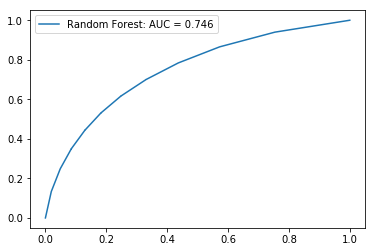

In [59]:
#Random Forest 
# forest = RandomForestClassifier()
# forest.fit(X_train, Y_train)

# forest_fpr, forest_tpr, forest_threshold = metrics.roc_curve (Y_test, forest.predict_proba(X_test)[:,1])
# forest_auc = metrics.auc(forest_fpr, forest_tpr)
# forest_accuracy = metrics.accuracy_score(Y_test, forest.predict(X_test))
# forest_recall = metrics.recall_score(Y_test, forest.predict(X_test))
# forest_precision = metrics.precision_score(Y_test, forest.predict(X_test))
# forest_f1 = metrics.f1_score(Y_test, forest.predict(X_test))
print('forest_accuracy = {accu:5.3f}, forest_recall = {rec:5.3f}, forest_precision = {prec:5.3f}, forest_f1 = {f1:5.3f}'.format(accu = forest_accuracy, rec = forest_recall, prec = forest_precision, f1 = forest_f1))
plt.plot(forest_fpr, forest_tpr,label = 'Random Forest: AUC = {auc:5.3f}'.format(auc = forest_auc))
plt.legend()

# RF on All Stations, with station id

In [ ]:
data_dir = '../Data/'
data_train = pd.read_csv(data_dir + 'train_clean.csv', sep='\t', error_bad_lines=False)
data_test = pd.read_csv(data_dir + 'test_clean.csv', sep='\t', error_bad_lines=False)

In [ ]:
weather_file_path = '../Data/Weather.csv'
weather_by_hour = parse_weather(weather_file_path)
d_train = merge_weather(weather_by_hour, data_train)
d_test = merge_weather(weather_by_hour,data_test)
